<a href="https://colab.research.google.com/github/Aycares/customer_churn_analysis/blob/main/Customer_Churn_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, auc



import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Telco_Customer_Churn_Dataset  (3).csv to Telco_Customer_Churn_Dataset  (3).csv


In [4]:
data = pd.read_csv('Telco_Customer_Churn_Dataset  (3).csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# check for missing values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
# Drop customerID
data = data.drop("customerID", axis=1)

In [7]:
# Make a copy of the DataFrame
data_encoded = data.copy()

# Get all columns that have text data (object type)
categorical_cols = data_encoded.select_dtypes(include='object').columns

# Apply LabelEncoder to each of those columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# Check the result
data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [8]:
# Separate input features and target

X = data_encoded.drop("Churn", axis=1)
y = data_encoded["Churn"]

# Split into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (5634, 19)
X_test: (1409, 19)
y_train: (5634,)
y_test: (1409,)


In [9]:
# 1. Initialize the Decision Tree Classifier

model = DecisionTreeClassifier(random_state=42, max_depth=2)

In [10]:
# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = model.predict(X_test)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7366926898509581

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1035
           1       0.50      0.71      0.59       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409


Confusion Matrix:
 [[773 262]
 [109 265]]


In [50]:
# Perform features hyper parameter tunning

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 11, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

In [51]:
# Create model
model = DecisionTreeClassifier(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,  # number of random combinations
    scoring='f1_macro',  # to balance class performance
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [54]:
# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate on test set
model = random_search.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters: {'splitter': 'random', 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 3, 'criterion': 'log_loss'}
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1035
           1       0.50      0.71      0.59       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409

[[773 262]
 [109 265]]


Churn Rate:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


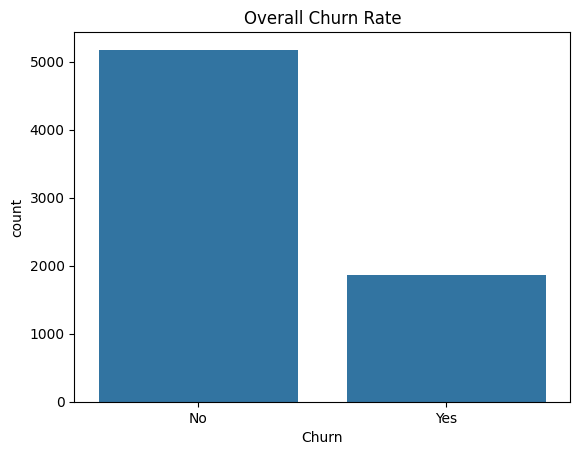

In [11]:
# Calculate and Visually Represent the Overall Churn Rate
# # Churn rate (numeric and visual)
churn_rate = data['Churn'].value_counts(normalize=True)
print("Churn Rate:\n", churn_rate)

# Bar plot
sns.countplot(x='Churn', data=data)
plt.title('Overall Churn Rate')
plt.show()

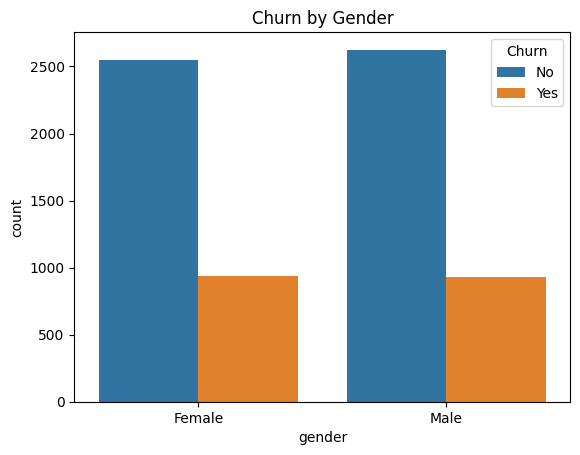

In [12]:
# Customer Distribution by Gender, Partner, and Dependent Status
# Gender
sns.countplot(x='gender', hue='Churn', data=data)
plt.title('Churn by Gender')
plt.show()



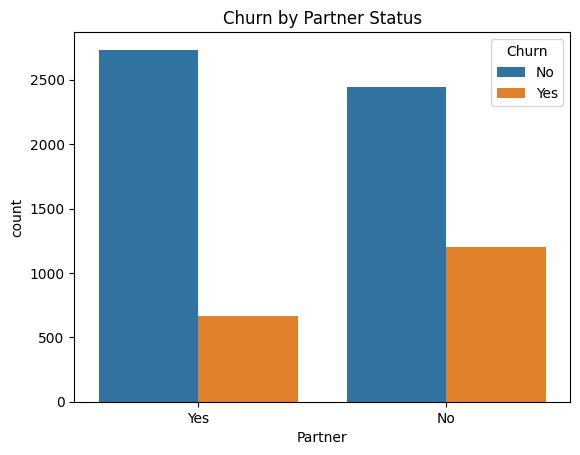

In [13]:
# Partner
sns.countplot(x='Partner', hue='Churn', data=data)
plt.title('Churn by Partner Status')
plt.show()


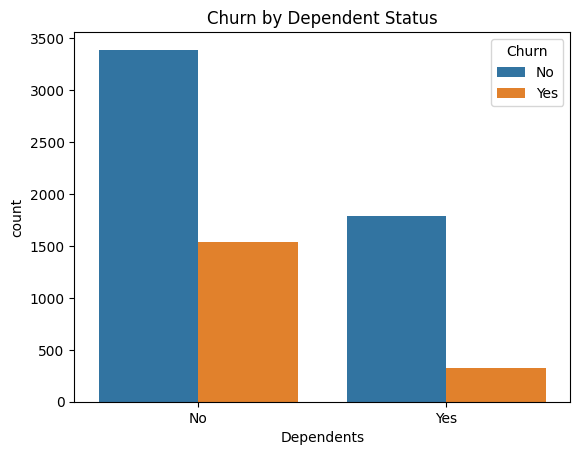

In [14]:
# Dependents
sns.countplot(x='Dependents', hue='Churn', data=data)
plt.title('Churn by Dependent Status')
plt.show()

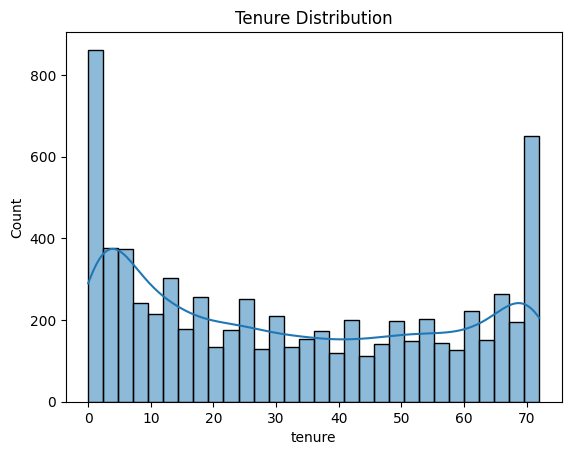

In [15]:
# Tenure Distribution and Its Relation with Churn
# Histogram of tenure
sns.histplot(data=data, x='tenure', bins=30, kde=True)
plt.title('Tenure Distribution')
plt.show()


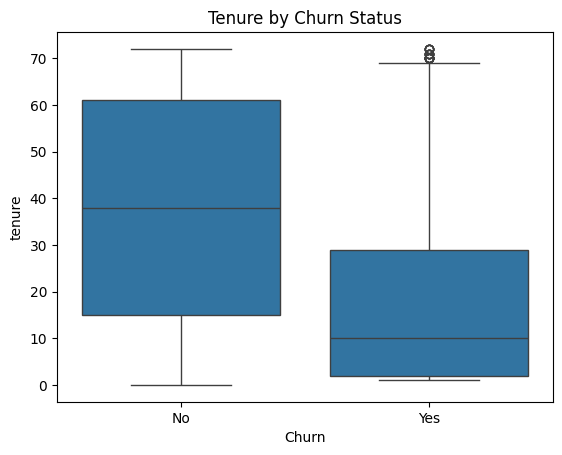

In [16]:
# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure by Churn Status')
plt.show()

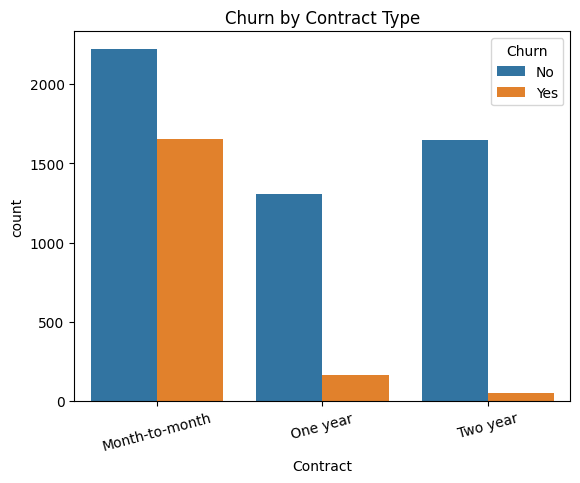

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64


In [17]:
# Churn by Contract Type

# Countplot for contract type vs churn
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.xticks(rotation=15)
plt.show()

 # checking the % churn by contract
print(data.groupby('Contract')['Churn'].value_counts(normalize=True))

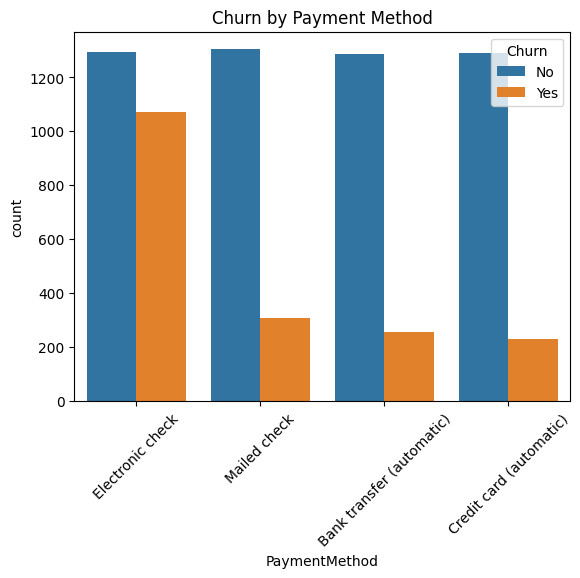

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: proportion, dtype: float64


In [18]:
# Churn by Payment Method

# Countplot for payment method vs churn
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

# checking the % churn by payment method
print(data.groupby('PaymentMethod')['Churn'].value_counts(normalize=True))

In [19]:
# Group customers into tenure clusters

clusters = [0, 12, 24, 48, 72]
labels = ['0-12 months', '13-24 months', '25-48 months', '49-72 months']
data['TenureGroup'] = pd.cut(data['tenure'], bins=clusters, labels=labels, include_lowest=True)

/tmp/ipython-input-4126060710.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = data.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack()


<Axes: title={'center': 'Churn Rate by Tenure Group'}, xlabel='TenureGroup'>

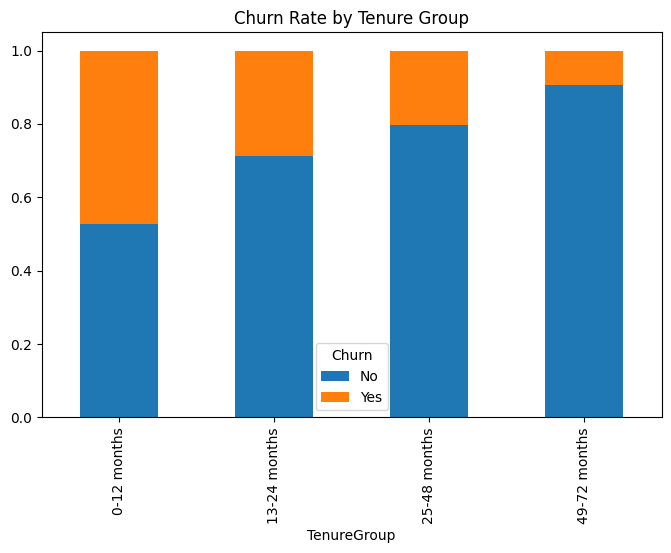

In [20]:
# Analyze churn within each group
tenure_churn = data.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack()
tenure_churn.plot(kind='bar', stacked=True, figsize=(8,5), title="Churn Rate by Tenure Group")

In [21]:
# Calculate percentage
tenure_percent = data['TenureGroup'].value_counts(normalize=True).sort_index() * 100

# Display as DataFrame
tenure_percent = tenure_percent.reset_index()
tenure_percent.columns = ['TenureGroup (months)', 'Percentage of Customers']
display(tenure_percent)

,TenureGroup (months),Percentage of Customers
0,0-12 months,31.037910
1,13-24 months,14.539259
2,25-48 months,22.632401
3,49-72 months,31.790430


In [22]:
# Segment by Monthly Charges in clusters
charges_bins = [0, 35, 70, 120]
charges_labels = ['Low', 'Medium', 'High']
data['ChargesGroup'] = pd.cut(data['MonthlyCharges'], bins=charges_bins, labels=charges_labels)



/tmp/ipython-input-3216249832.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_churn = data.groupby('ChargesGroup')['Churn'].value_counts(normalize=True).unstack()


<Axes: title={'center': 'Churn Rate by Monthly Charges'}, xlabel='ChargesGroup'>

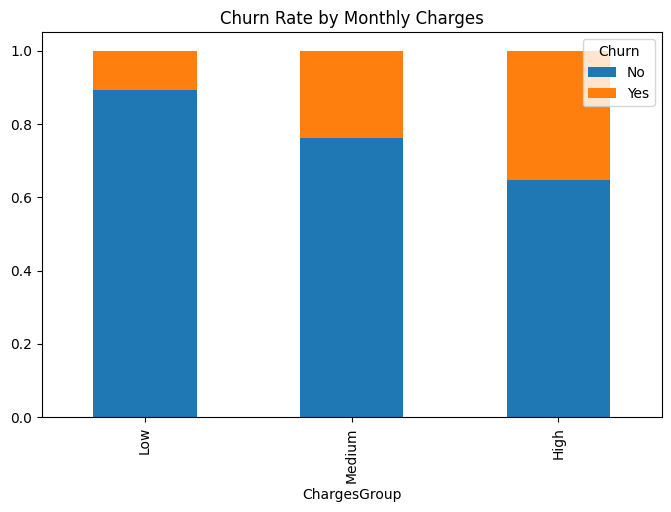

In [23]:
# # Visualize churn rate by charges group
charges_churn = data.groupby('ChargesGroup')['Churn'].value_counts(normalize=True).unstack()
charges_churn.plot(kind='bar', stacked=True, figsize=(8,5), title="Churn Rate by Monthly Charges")

In [24]:
# Calculate percentage
monthly_distribution = data['ChargesGroup'].value_counts(normalize=True).sort_index() * 100

# Display as DataFrame
monthly_distribution = monthly_distribution.reset_index()
monthly_distribution.columns = ['ChargesGroup (months)', 'Percentage of Customers']
display(monthly_distribution)

,ChargesGroup (months),Percentage of Customers
0,Low,24.634389
1,Medium,24.492404
2,High,50.873207


<Axes: title={'center': 'Churn Rate by Contract Type'}, xlabel='Contract'>

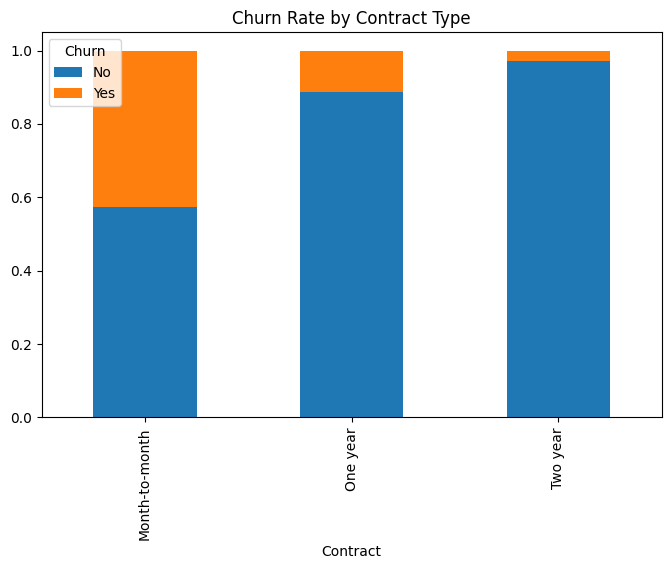

In [25]:
# Segment by Contract Type

contract_churn = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True, figsize=(8,5), title="Churn Rate by Contract Type")

In [26]:
# Calculate percentage
contract_churn= data['Contract'].value_counts(normalize=True).sort_index() * 100

# Display as DataFrame
contract_churn = contract_churn.reset_index()
contract_churn.columns = ['Contract (Churn)', 'Percentage of contract_churn']
display(contract_churn)

,Contract (Churn),Percentage of contract_churn
0,Month-to-month,55.019168
1,One year,20.914383
2,Two year,24.066449


In [27]:
# Identify High-Value At-Risk Customers
high_value_churners = data[
    (data['MonthlyCharges'] > data['MonthlyCharges'].quantile(0.75)) &
    (data['Contract'] != 'Month-to-month') &
    (data['Churn'] == 1)
]

print("High-value at-risk customers:", len(high_value_churners))

High-value at-risk customers: 0


In [56]:
# APPLYING ROC CURVE AND AUC CALCULATION FOR MODEL PERFORMANCE

# Predict probabilities for the positive class (churn = 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [57]:
# Compute ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


In [58]:
# Compute AUC

roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

AUC: 0.7858


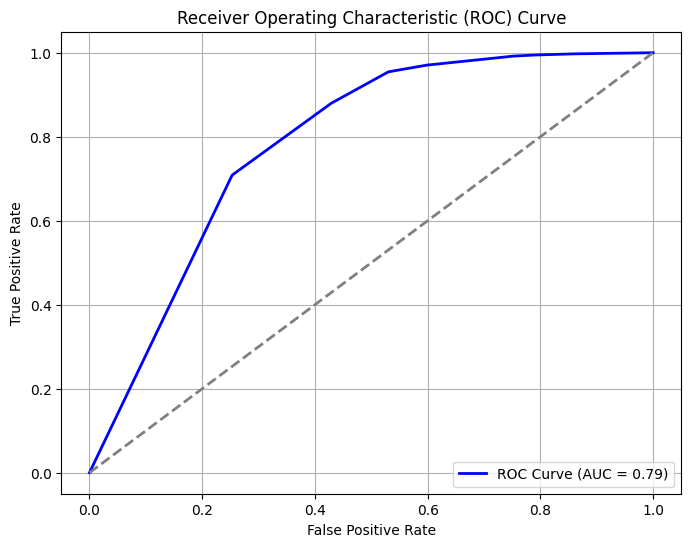

In [59]:
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

/tmp/ipython-input-4076939432.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


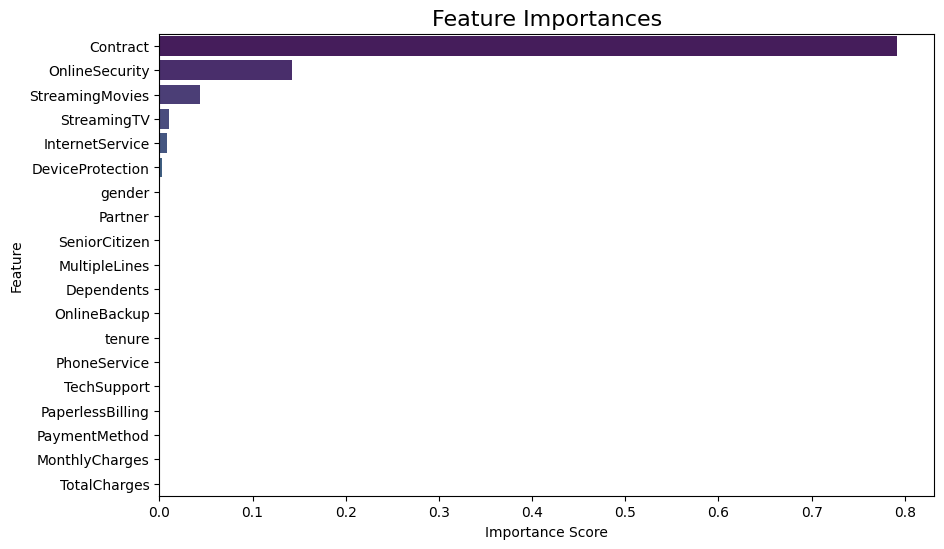

In [60]:
# INTERPRETATION FOR FEATURE IMPORTANCE

# Get feature importances from your model

importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

**Task 6: Business Recommendations**

**Objective**
Based on the predictive model results and churn segment analysis, this section outlines targeted actions to reduce customer churn and protect revenue.

**Key Insights**
The highest churn risk is concentrated among customers with Month-to-month contracts, No Online Security, and Fiber optic internet.


Streaming TV presence varies, but churn rates remain high across these profiles.


**Three main segments account for a large share of at-risk revenue**

Segment Profile	Churn Rate	Estimated Monthly Revenue at Risk
Month-to-month	No Online Security	Yes StreamingTV
Month-to-month	No Online Security	No StreamingTV
Month-to-month	No Online Security	Yes StreamingTV

**Recommendations**
Retention Incentives

-Offer 3-6 months of free Online Security to customers in these segments.

-Provide contract upgrade discounts to encourage migration to annual or biannual plans.

**Targeted Communication**

-Use personalized campaigns highlighting the value and safety benefits of Online Security services.

-Focus messaging on cost savings and service reliability to justify longer contracts.

**Service Bundle Promotions**

-Bundle Streaming TV with Internet services at a discounted rate for DSL and Fiber optic customers.

-Offer flexible package upgrades that combine entertainment with security features.

**Estimated Impact**

-Churn Reduction: Lower churn in the top 3 segments by 20%.

-Revenue Impact: Potential monthly revenue savings of 9,000-10,000.

Overall Churn Rate Drop: Reduction of 3-5% points across the customer base.

By prioritizing these high-risk segments, the business can achieve quick wins in churn reduction while building long-term customer loyalty.

In [65]:
# Estimate the potential impact of these recommendations on revenue and churn rate.

# Group by top churn-related features
grouped = data.groupby(['Contract', 'OnlineSecurity','StreamingMovies', 'StreamingTV', 'InternetService']).agg(
    total_customers=('Churn', 'count'),
    churned=('Churn', lambda x: (x == 'Yes').sum())
).reset_index()

# Calculate churn rate
grouped['churn_rate'] = grouped['churned'] / grouped['total_customers']

# Estimate impact: Assume a targeted retention strategy reduces churn by 20%
reduction_factor = 0.20
grouped['estimated_customers_retained'] = grouped['churned'] * reduction_factor

# Assume avg monthly revenue per customer
avg_monthly_revenue = data['MonthlyCharges'].mean()
grouped['estimated_revenue_saved'] = grouped['estimated_customers_retained'] * avg_monthly_revenue

# Sort by churn rate descending
grouped = grouped.sort_values(by='churn_rate', ascending=False)

grouped

,Contract,OnlineSecurity,StreamingMovies,StreamingTV,InternetService,total_customers,churned,churn_rate,estimated_customers_retained,estimated_revenue_saved
7,Month-to-month,No,Yes,Yes,Fiber optic,550,332,0.603636,66.4,4300.176379
3,Month-to-month,No,No,Yes,Fiber optic,280,161,0.575000,32.2,2085.326497
5,Month-to-month,No,Yes,No,Fiber optic,284,162,0.570423,32.4,2098.278836
1,Month-to-month,No,No,No,Fiber optic,660,376,0.569697,75.2,4870.079273
16,Month-to-month,Yes,Yes,Yes,Fiber optic,112,50,0.446429,10.0,647.616925
12,Month-to-month,Yes,No,Yes,Fiber optic,58,25,0.431034,5.0,323.808462
4,Month-to-month,No,Yes,No,DSL,99,40,0.404040,8.0,518.093540
0,Month-to-month,No,No,No,DSL,543,198,0.364641,39.6,2564.563021
6,Month-to-month,No,Yes,Yes,DSL,115,40,0.347826,8.0,518.093540
2,Month-to-month,No,No,Yes,DSL,100,34,0.340000,6.8,440.379509
